In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import random
import scipy
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils

# Load Car Train Dataset

In [2]:
carstrain_folder = "data/cars_train/"
car_annotations_path = "data/devkit/cars_train_annos.mat"
car_metadata_path = "data/devkit/cars_meta.mat"

#Loading the Dataset

annotations = loadmat(car_annotations_path)
meta = loadmat(car_metadata_path)
meta = np.concatenate(meta["class_names"][0])

dataset = []
columns = ["x1", "y1", "x2", "y2", "class ID", "Model","Image name"]
for example in annotations["annotations"][0]:
    
    filename = example[-1][0]
    annos = np.concatenate(list(example)[:-1]).ravel().tolist()
    carmodel = meta[example[-2][0] - 1][0]
    dataset.append(annos + [carmodel] + [filename])
    
dataset = pd.DataFrame(dataset, columns=columns)

In [3]:
dataset.head()

,x1,y1,x2,y2,class ID,Model,Image name
0,39,116,569,375,14,Audi TTS Coupe 2012,00001.jpg
1,36,116,868,587,3,Acura TL Sedan 2012,00002.jpg
2,85,109,601,381,91,Dodge Dakota Club Cab 2007,00003.jpg
3,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,00004.jpg
4,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,00005.jpg


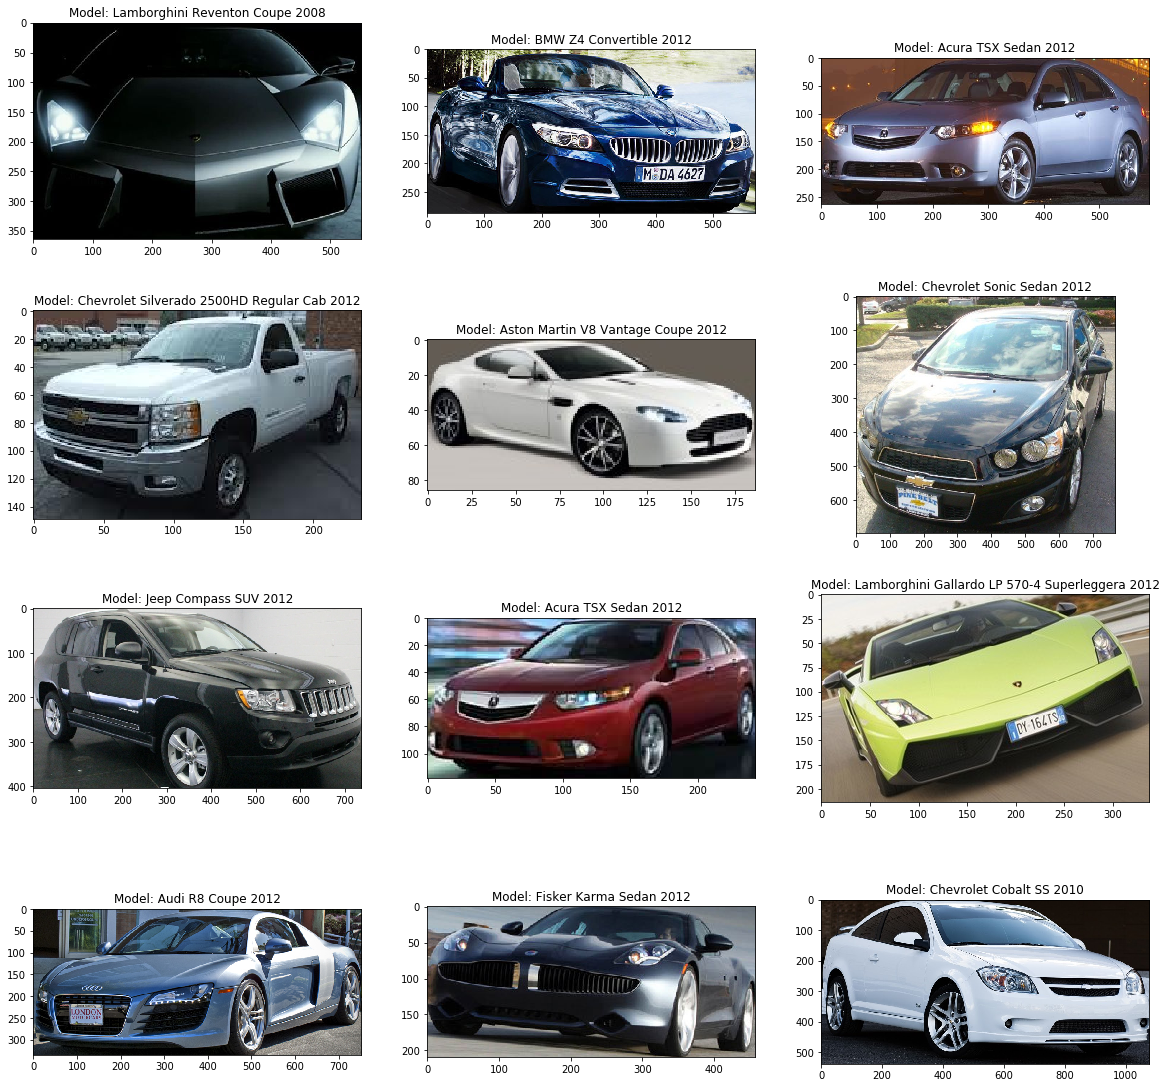

In [4]:
#Quick Sanity Check
fig = plt.figure(figsize=(20,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    
    idx = random.randint(0, annotations["annotations"].shape[1]-1)
    
    image = mpimg.imread(os.path.join(carstrain_folder, dataset.iloc[idx]["Image name"]))
    plt.imshow(image[dataset.iloc[idx]["y1"]: dataset.iloc[idx]["y2"], dataset.iloc[idx]["x1"] : dataset.iloc[idx]["x2"]])
    plt.title("Model: {}".format(dataset.iloc[idx]["Model"]))

plt.show()

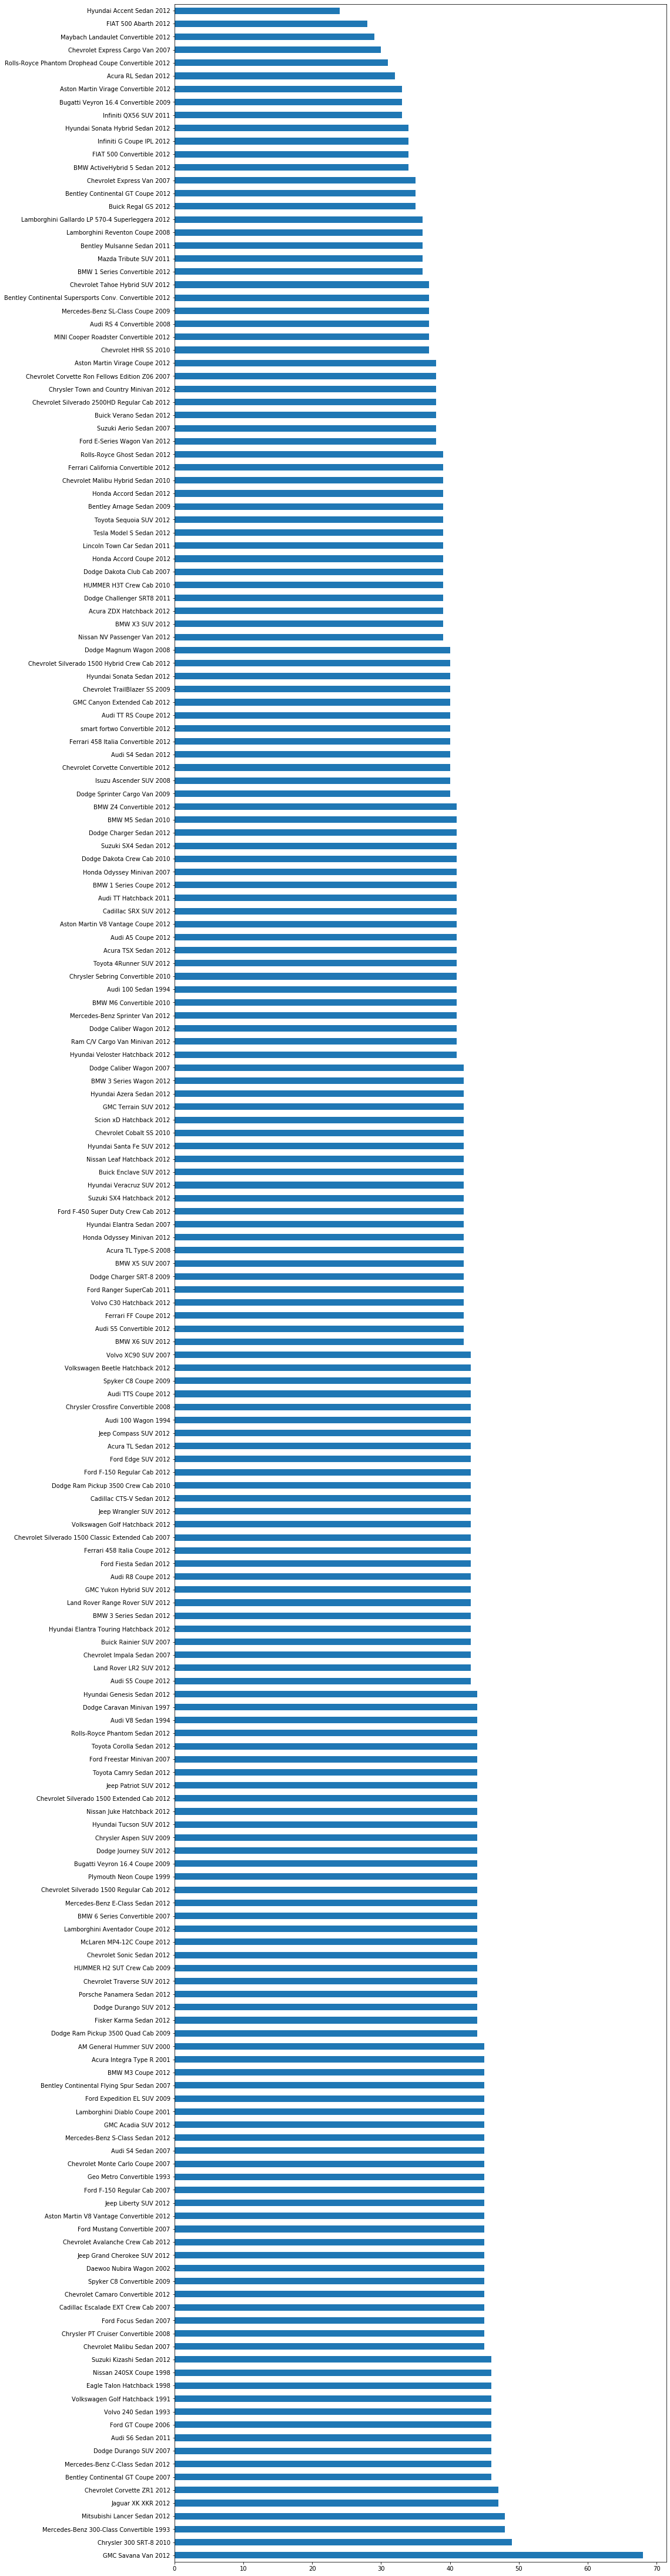

In [5]:
#CHECK DATASET CLASSES
dataset["Model"].value_counts().plot.barh(figsize=(15,80))

In [6]:
print("Lowest Count in a Class: {}".format(dataset["Model"].value_counts().min()))
print("Highest Count in a Class: {}".format(dataset["Model"].value_counts().max()))
print("Average Count {}".format(dataset["Model"].value_counts().mean()))

Lowest Count in a Class: 24
Highest Count in a Class: 68
Average Count 41.55102040816327


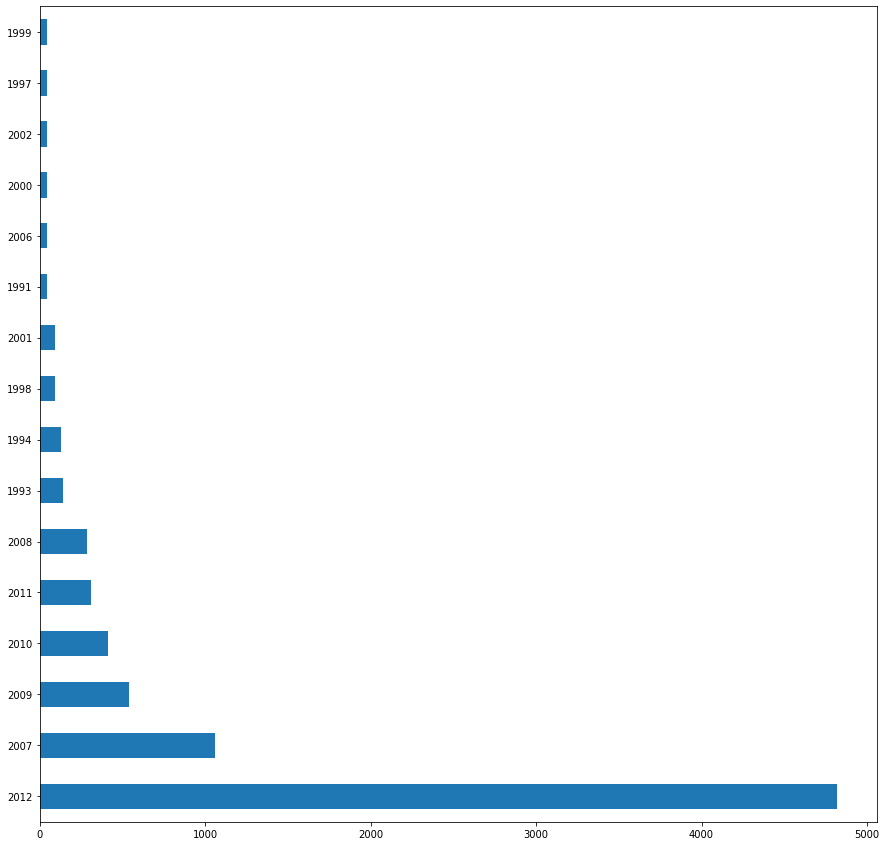

In [9]:
#Check Year Distribution of CARS
years, yearsID = utils.get_Year(dataset["Model"].values)
pd.Series(years).value_counts().plot.barh(figsize=(15,15))

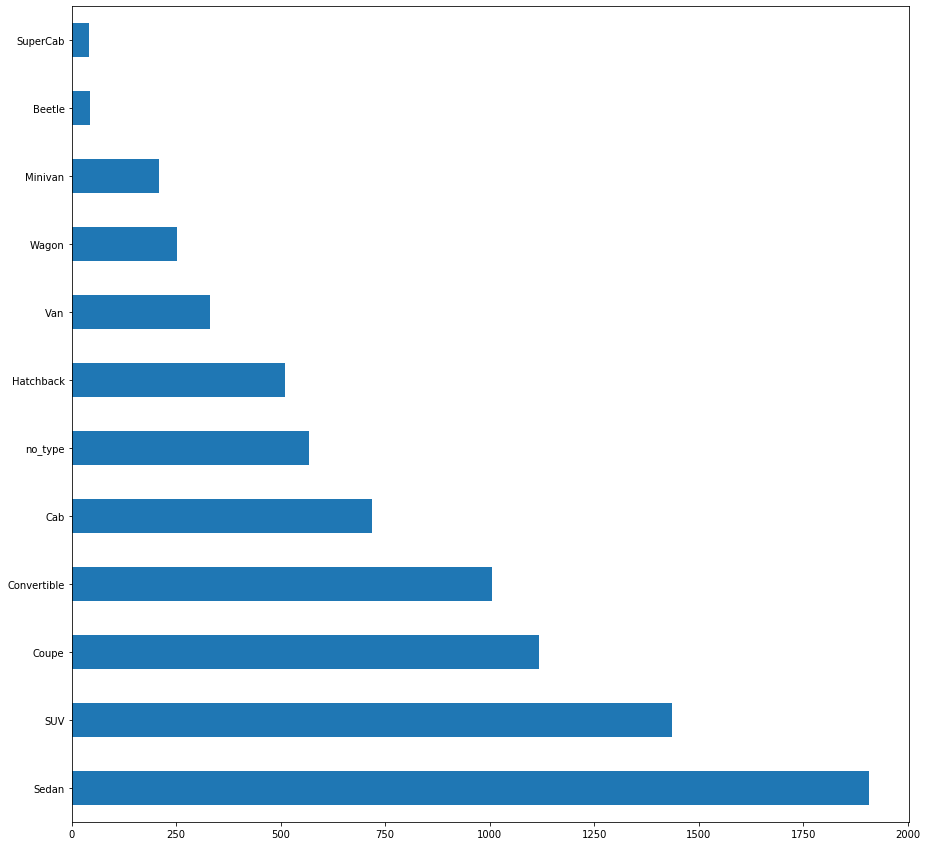

In [10]:
#Check Year Distribution of CARS
years, yearsID = utils.get_Type(dataset["Model"].values)
pd.Series(years).value_counts().plot.barh(figsize=(15,15))

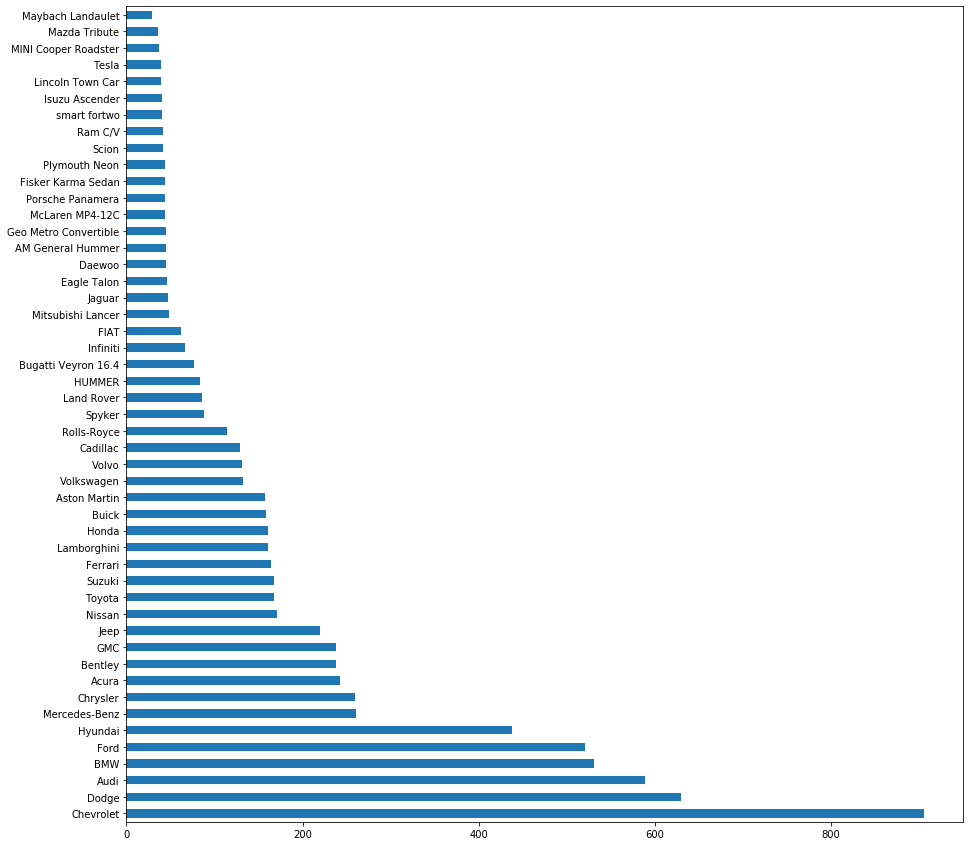

In [11]:
#Check Year Distribution of CARS
years, yearsID = utils.get_Maker(dataset["Model"].values)
pd.Series(years).value_counts().plot.barh(figsize=(15,15))

In [ ]:
#Generating Synthetic Data#Check Year Distribution of CARS
years, yearsID = utils.get_Year(dataset["Model"].values)
pd.Series(years).value_counts().plot.barh(figsize=(15,15))

In [ ]:
X = []
y = dataset["type ID"].values

for idx, val in enumerate(dataset[["type ID", "Image name"]].values):
    img = mpimg.imread(os.path.join(carstrain_folder, val[1]))
    flatten_img = list(cv2.resize(img[dataset.iloc[idx]["y1"]: dataset.iloc[idx]["y2"], dataset.iloc[idx]["x1"] : dataset.iloc[idx]["x2"]], (224,224)).flatten()/255)
    X.append(flatten_img)
    if idx % 1000 == 0:
        print("{} images done".format(idx))

In [ ]:
df=pd.DataFrame(X)
df["Y"] = y

In [ ]:
import time

In [ ]:
#Visualize the Different 
# For reproducability of the results
np.random.seed(42)
N =2000
rndperm = np.random.permutation(df.shape[0])

df_subset = df.loc[rndperm[:N],:].copy()
df_subset.dropna(inplace=True)
data_subset = df_subset.drop(columns=["Y"]).values


tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(data_subset)